# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [2]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = ''

### 之前做過的處理

In [3]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [4]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [6]:
app_train['YEARS_BIRTH'] = round(app_train['DAYS_BIRTH']/365)
intervals = [20,25,30,35,40,45,50,55,60]
app_train['BIRTH_GROUP'] = pd.cut(app_train['YEARS_BIRTH'],bins = intervals)

In [7]:
app_train['BIRTH_GROUP'].value_counts().sort_index()

(20, 25]    14213
(25, 30]    34656
(30, 35]    39473
(35, 40]    43297
(40, 45]    40585
(45, 50]    34924
(50, 55]    34910
(55, 60]    33045
Name: BIRTH_GROUP, dtype: int64

In [17]:
df = pd.crosstab(app_train['BIRTH_GROUP'],app_train['TARGET'])
df

TARGET,0,1
BIRTH_GROUP,,
"(20, 25]",12492,1721
"(25, 30]",30784,3872
"(30, 35]",35492,3981
"(35, 40]",39469,3828
"(40, 45]",37444,3141
"(45, 50]",32340,2584
"(50, 55]",32618,2292
"(55, 60]",31235,1810


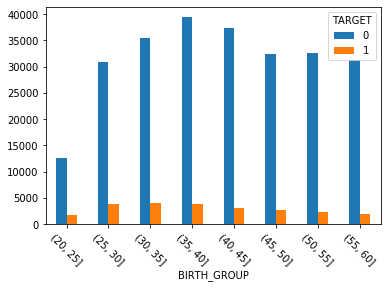

In [25]:
df.plot.bar(stacked=False,rot=-45)

In [28]:
app_train['BIRTH_GROUP_Q'] = pd.qcut(app_train['YEARS_BIRTH'],10)
app_train['BIRTH_GROUP_Q'].value_counts().sort_index()

(20.999, 28.0]    33457
(28.0, 32.0]      31746
(32.0, 36.0]      31291
(36.0, 39.0]      26543
(39.0, 43.0]      33670
(43.0, 47.0]      30052
(47.0, 52.0]      33546
(52.0, 56.0]      28410
(56.0, 61.0]      32183
(61.0, 69.0]      26613
Name: BIRTH_GROUP_Q, dtype: int64

In [29]:
df = pd.crosstab(app_train['BIRTH_GROUP_Q'],app_train['TARGET'])
df

TARGET,0,1
BIRTH_GROUP_Q,,
"(20.999, 28.0]",29588,3869
"(28.0, 32.0]",28318,3428
"(32.0, 36.0]",28224,3067
"(36.0, 39.0]",24227,2316
"(39.0, 43.0]",30998,2672
"(43.0, 47.0]",27736,2316
"(47.0, 52.0]",31178,2368
"(52.0, 56.0]",26631,1779
"(56.0, 61.0]",30456,1727


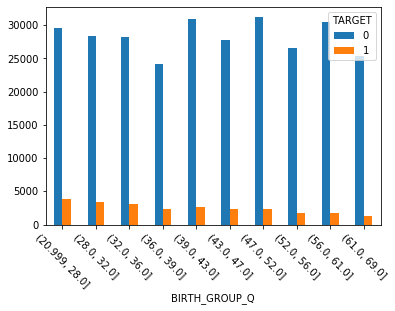

In [32]:
df.plot.bar(stacked=False,rot=-45)